|First Name     |Last Name    |MtkNr.      |Due Date  | 
|:-------------:|:-----------:|:----------:|:--------:|
| Write Here    | Write Here  |12345678     | 24.11.2025, 16:00

<h1 style="color:rgb(150,100,10)">Computer Vision Course</h1>
<h2 style="color:rgb(150,100,10)">Assignment 2 – Feature Extraction and Segmentation </h2>

<b>Authors:</b> O. Bimber, M. Abbass<br>
<b>Date:</b> 23-06-2025

<b>This file is part of the "Computer Vision Course 2025W" UE material.</b>

<h2 style="color:rgb(150,100,10)">Table of Contents</h2>
<ol>
    <a style="color:rgb(150,100,10)" href="#Feature-Extraction"><li style="font-size:large;font-weight:bold">Feature Extraction [25 points]</li></a>
    <ol style="margin-bottom:15px">
        <a style="color:rgb(150,100,10)" href="#Extracting-Feature-Maps-from-Pretrained-Torch-Models"><li style="font-size:medium">Extracting Feature Maps from Pretrained Torch Models</li></a>
        <a style="color:rgb(150,100,10)" href="#Extracting-Feature-Maps-from-a-Custom-PyTorch-Model"><li style="font-size:medium">Extracting Feature Maps from a Custom PyTorch Model</li></a>
    </ol>
    <a style="color:rgb(150,100,10)" href="#Segmentation"><li style="font-size:large;font-weight:bold">Segmentation [75 points]</li></a>
    <ol style="margin-bottom:15px">
        <a style="color:rgb(150,100,10)" href="#Preparing-the-dataset-and-our-environment"><li style="font-size:medium">Preparing the dataset and our environment</li></a>
        <a style="color:rgb(150,100,10)" href="#Apply-UNet-for-segmentation"><li style="font-size:medium">Apply UNet for segmentation</li></a>
        <a style="color:rgb(150,100,10)" href="#Apply-attention-model-(open-Task)"><li style="font-size:medium">Apply attention model (Open Task)</li></a>
    </ol>
</ol>

<h2 style="color:rgb(255,0,0)">Please be aware that in this assignment we train and evaluate some models, which requires time. Thus, please avoid submitting your assignment at the last minute</h2>

<h2 style="color:rgb(255,0,0)">Any content unrelated to the assignment, such as images, Python code (functions or classes), additional packages, or libraries, etc., will result in a deduction of 50 points.</h2>

<h1 style="color:rgb(255,0,0)">Important Note</h1>

<b>In this assignment, you may use the default parameters of any built-in function unless specified otherwise.</b>

<b style="color:rgb(255,70,0)">All cells must be executed; any unevaluated cell will not be considered, regardless of the correctness of the code.</b>

<b style="color:rgb(255,70,0)">All cells must be indexed; any non-indexed cell will not be considered.</b>

<b style="color:rgb(255,70,0)">Modifying the given code (even a single line), whether by replacing, changing, commenting, or removing, is strictly not allowed and will result in a loss of 50 points unless explicitly specified otherwise.</b>

<b style="color:rgb(255,70,0)">Redundant code, especially duplicating or copying the given code in different places, will result in a deduction of 25 points.</b>

<b style="color:rgb(255,70,0)">Importing the same packages multiple times in different cells will result in a deduction of 25 points.</b>

<b style="color:rgb(255,70,0)">All packages are imported in the first code cell. Any changes to this cell, including modifications, removals, or additions of packages or libraries, will result in a deduction of 50 points.</b>

<b>If you have GPU resources available on your machine, please utilize them; otherwise, you can use your CPU.</b>

<b>Always set the seed value to 123 unless specified otherwise.</b>

In [1]:
# Import all packages needed in this notebook.
import numpy as np
import cv2 as cv
from PIL import Image
from matplotlib import pyplot as plt

import os, time, random
from tqdm import tqdm

import torch
from torch import nn
from torch.utils.data import DataLoader, random_split
from torchvision.transforms import functional as F
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

if not os.path.exists('resources'): raise TypeError("Please create the resources folder and include all required files")
print('All necessary packages are successfully installed')

All necessary packages are successfully installed


<a name="Feature-Extraction"></a><h2>Feature Extraction</h2>

In this part, we are supposed to learn how to extract the feature maps from different models to see what the models are learning.

<a name="Extracting-Feature-Maps-from-Pretrained-Torch-Models"></a><h3>Extracting Feature Maps from Pretrained Torch Models</h3>

<b>Exercise 1.1. [2 Points]</b>

<b>Goal:</b> Use a popular model from <i><b>torchvision</b></i> and extract its feature maps.

<b>Task</b>
<ul> <li>Use <i><b>torchvision.models</b></i> to load <i><b>VGG16</b></i>.</li>
<li>Set <i><b>pretrained=True</b></i>.</li>
</ul>

<b>Hint</b>
<ul>
<li>The <i><b>VGG16</b></i> model is available in the <i><b>TorchVision</b></i> library.</ul>

Documentation: <i><b>VGG16 — TorchVision</b></i> is [Here](https://docs.pytorch.org/vision/main/models/generated/torchvision.models.vgg16.html#torchvision.models.vgg16) </li>

In [5]:
# code goes here
model = models.vgg16(pretrained=True)


<b>Exercise 1.2. [2 Points]</b>

<b>Goal:</b> Extract the feature maps from the given model to observe what the model has learned.

<b>Task</b>
<ul> 
<li>Use the <i><b>features_Extraction</b></i> function to extract the feature maps.</li>
<li>Use the provided image <i><b>img_A2_1</b></i> located in the <i><b>resources folder</b></i>.</li>    
</ul>

<b>Hint</b>
<ul> 
<li>You need to provide both the configured model and the target image to the <i><b>features_Extraction</b></i> function.</li>
</ul>

In [6]:
def features_Extraction(input_model, input_Image):
    input_model.eval()
    layer_to_hook = input_model.features[0]
    
    feature_maps = []
    def hook_fn(module, input, output):
        feature_maps.append(output.detach())
    hook = layer_to_hook.register_forward_hook(hook_fn)
    transform = transforms.Compose([ transforms.Resize((224, 224)), transforms.ToTensor() ])
    img = Image.open(input_Image)
    input_tensor = transform(img).unsqueeze(0)
    with torch.no_grad():
        _ = input_model(input_tensor)
    hook.remove()
    print("Shape of feature maps:", feature_maps[0].shape)
    
    return feature_maps

In [8]:
# code goes here
img_path = 'resources/img_A2_1.jpg'
feature_maps = features_Extraction(model, img_path)


Shape of feature maps: torch.Size([1, 64, 224, 224])


<b>Exercise 1.3. [1 Points]</b>

<b>Goal:</b> Visualize the feature maps to understand what the model learns

<b>Task</b>
<ul>
<li>Use the function <i><b>visualize_Features</b></i> to visualize the feature maps.<i>
<li>The number of feature maps displayed should be arranged in a grid of <i><b>3 rows</b></i> rows and <i><b>4 columns</b></i>.<i>   
</ul>

<b>Hint</b>
<ul>
<li>The <i><b>visualize_Features</b></i> function accepts three attributes: the <i><b>feature maps</b></i> themselves, and the <i><b>number of rows and columns</b></i> to display.</li> 
</ul>

In [9]:
def visualize_Features(feature_maps_toShow, nu_Rows=1, nu_Columns=1):
    fm = feature_maps_toShow[0][0]
    fig, ax = plt.subplots(nu_Rows, nu_Columns, figsize=(10,9))
    for ix, axis in enumerate(ax.flat):
        axis.set_title('Filter: '+str(ix))
        axis.imshow(fm[ix].cpu())
    plt.tight_layout()
    plt.show()

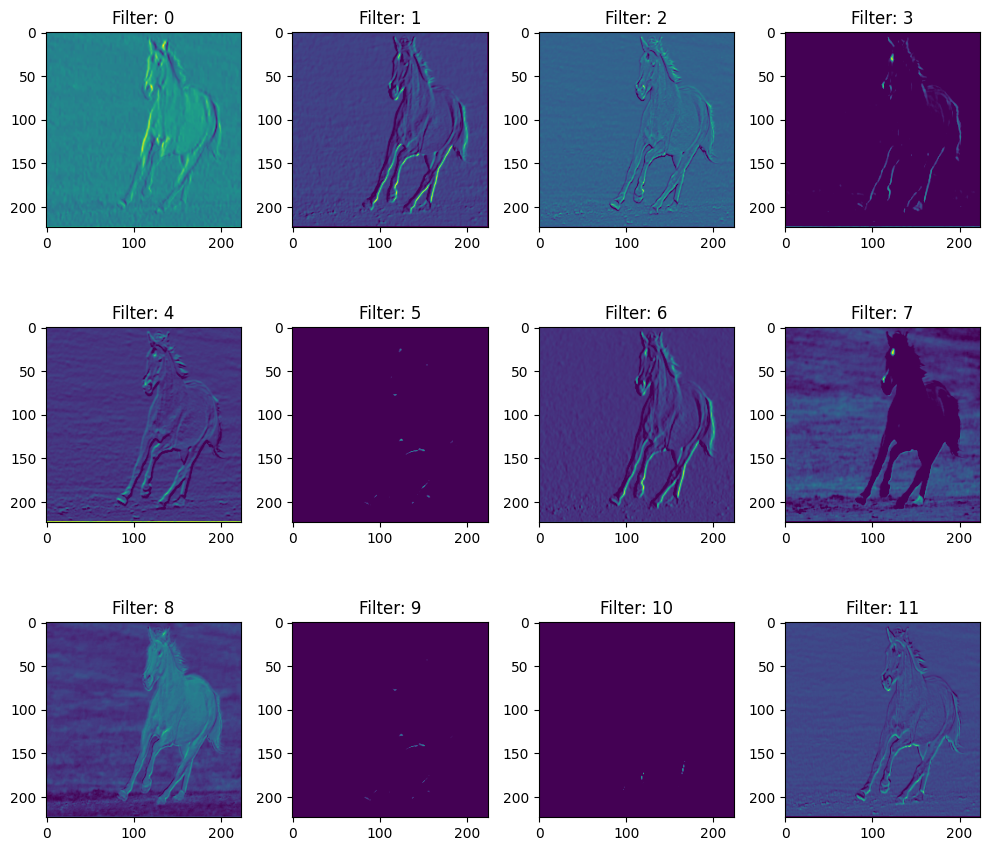

In [10]:
# code goes here
visualize_Features(feature_maps, 3, 4)


<a name="Extracting-Feature-Maps-from-a-Custom-PyTorch-Model<"></a><h3>Extracting Feature Maps from a Custom PyTorch Model</h3>

<b>Exercise 1.4. [4 Points]</b>

<b>Goal:</b> Prepare a custom model and extract the feature maps from it.

<b>Task</b>
<ul>

<li>Complete the cell below to create a custom model  as follows: 
<ol>
  <li><i><b>Conv2d</b></i> layer with <i><b>3 input channels</b></i>, <i><b>16 output channels</b></i>, and a <i><b>kernel size of 5</b></i>.</li>
  <li><i><b>ReLU</b></i> layer and <i><b>inplace is True</b></i>.</li>
  <li><i><b>Conv2d</b></i> layer with <i><b>3 output channels</b></i>, and a <i><b>kernel size of 5</b></i>.</li>
  <li><i><b>ReLU</b></i> layer and <i><b>inplace is True</b></i>.</li>
  <li><i><b>MaxPool2d</b></i> layer and <i><b>kernel_size is 2</b></i></li>
</ol>
</ul>

<b>Hint</b>
<ul>
<li>For simplicity, we create a few layers. However, you can extend the idea by creating more than these layers and extracting whichever maps you require after the training is done.</li>    
</ul>

Documentations are as follows: <i><b>Conv2d</b></i> is [Here](https://docs.pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) </li>, <i><b>ReLU</b></i> is [Here](https://docs.pytorch.org/docs/stable/generated/torch.nn.ReLU.html) </li>, and <i><b>MaxPool2d</b></i> is [Here](https://docs.pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html) </li>

In [21]:
model_Custom_Ex14 = nn.Sequential(
    # code goes here
   nn.Conv2d(3, 16, kernel_size=5),
   nn.ReLU(inplace=True),
   nn.Conv2d(16, 3, kernel_size=5),
   nn.ReLU(inplace=True),
   nn.MaxPool2d(kernel_size=2)
)

<b>Exercise 1.5. [1 Points]</b>

<b>Goal:</b> Extract the feature map from a custom model.

<b>Task</b>
<ul> 
<li>Use the <i><b>custom_Features_Extraction</b></i> function to extract the feature maps.</li>    
<li>Use the same provided image <i><b>img_A2_1</b></i> from the <i><b>resources folder</b></i>.</li>
<li>Pass the custom <i><b>model</b></i> created in <i><b>Ex 1.4</b></i> to the <i><b>custom_Features_Extraction</b></i> function.</li>
</ul>

<b>Hint</b>
<ul> 
<li>You need to provide both the custom model and our selected image as arguments to the <i><b>custom_Features_Extraction</b></i> function.</li>   
</ul>

In [22]:
def custom_Features_Extraction(model_Custom_toExtract, ip_Img_CustomModel, id_intended=0):
    feature_maps = {}
    def get_feature_map(name):
        def hook(model, input, output):
            feature_maps[name] = output.detach()
        return hook

    for idx, layer in enumerate(model_Custom_toExtract):
        if id_intended ==idx:
            layer.register_forward_hook(get_feature_map(f"conv_{idx}"))
    
    transform = transforms.Compose([ transforms.Resize((224, 224)), transforms.ToTensor()])
    img = Image.open(ip_Img_CustomModel)
    input_tensor = transform(img).unsqueeze(0)
    print(input_tensor.shape)
    _ = model_Custom_toExtract(input_tensor)

    return feature_maps

In [28]:
# code goes here
custom_feature_map = custom_Features_Extraction(model_Custom_Ex14, img_path)


torch.Size([1, 3, 224, 224])


<b>Exercise 1.6. [15 Points]</b>

<b>Question</b>
<ul> 
<li>Q1) Let's assume that the custom model created in Ex. 1.4 will be trained on specific data and we set up the optimizer and the loss function. What steps are required in Ex. 1.4 to maintain spatial details and avoid vanishing gradients?</li>
<li>Q2) Print both models (VGG16 and our custom model). What is the difference?</li>
<li>Q3) Why can't we train our custom model for both feature extraction and classification tasks?</li>
    
</ul>

<b>Hint</b>
<ul>
<li>Each question must be answered in <i><b>1~4 lines</b></i> maximum. Exceeding 4 lines may result in point deductions.</li>
</ul>

<b>The explanation goes here:</b>

A1) We must choose an appropriate ReLu activation function to mitigate vanishing gradients.

A2) VGG16 is much more sophisticated than our model. Also the number of output channels produced by the convolutions is much higher in the VGG16 model. Furthermore, VGG16 has a pooling layer and a fully connected classifier at the end. Our model just extracts features.

A3) Our model is missing the fully connected layer which maps extracted features to class probabilities. The output are three 2d feature maps designed for spatial feature extraction and not classification.

In [29]:
# Code goes here ==>> for printing both models (VGG 16 and the custom model)
print(model)
print(model_Custom_Ex14)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

<a name="Segmentation"></a><h2>Segmentation</h2>

In this part, we utilize one of the most popular techniques in image segmentation: <i><b>UNet</b></i>.

<span style="color:rgb(200,100,10)">More details about UNet model can be found [Here](https://link.springer.com/chapter/10.1007/978-3-319-24574-4_28)</span>.
    

<b>The main goal in this part can be broken down into three sub-goals as follows:</b>
<ul>
<li>Split the data into three parts (train, test, validation).</li>    
<li>Train UNet to segment our object.</li>
<li>Test our trained model using the unseen test subset.</li>
</ul>

<h3 style="color:rgb(255,0,0)">Important Note</h3>
<span style="color:rgb(125,0,0)">We use one published version of UNet model. However, there are several <i><b>published models</b></i> that you can find.</span>

We use a dataset containing one class, which is: <span style="color:rgb(200,0,200)">Blood vessel pixels</span>. <span style="color:rgb(200,100,10)">More details about the dataset can be found [Here](https://www.kaggle.com/datasets/abdallahwagih/retina-blood-vessel)</span>.

<a name="Here is the example of crack segmentation"></a><h3 style="color:rgb(100,0,200)">Here is the example of Retina Blood segmentation from the site of [kaggle](https://www.kaggle.com/datasets/abdallahwagih/retina-blood-vessel)</h3>
<img src="resources/Example_Retina-Blood-A2.jpg" alt="Image not found!"/>

<h3 style="color:rgb(150,75,0)">Let's work on our dataset and its preparation:</h3>
<ul> <li><span style="color:rgb(180,40,40)">The dataset, named <i><b>Retina-Blood-A2</b></i>, is zipped in <i><b>resources</b></i> folder and contains two subfolders: images and masks.</span> 

<a name="Preparing-the-dataset-and-our-environment"></a><h3>Preparing the dataset and our environment</h3>

<b>Exercise 2.1. [1 Points]</b>

<b>Goal:</b> Read all images and their corresponding masks.

<b>Task</b>
<ul>
<li>Run the given function <i><b>segmDataset</b></i> to read all data and convert them to tensors.<i>
<li>You need to provide the correct <i><b>path of the data</b></i>.</li> 
</ul>

<b>Hint</b>
<ul>
<li>The provided <i><b>segmDataset</b></i> function already converts the images and their corresponding masks to tensors.</li>
<li>You must <i><b>unzip</b></i> the dataset folder <i><b>Retina-Blood-A2</b></i> and place the unzipped folder inside the resources directory.</li>
</ul>

In [30]:
class segmDataset(Dataset):
    def __init__(self, root_path, resize_IMG_MASK=320):  
        self.root_path = root_path
        self.resize_IMG_MASK = resize_IMG_MASK
        self.images = sorted([self.root_path + "/images/" + i for i in os.listdir(self.root_path + "/images/" )])
        self.masks = sorted([self.root_path + "/masks/" + i for i in os.listdir(self.root_path + "/masks/")])
        self.transform = transforms.Compose([
            transforms.Resize((self.resize_IMG_MASK, self.resize_IMG_MASK)),
            transforms.ToTensor(), ])

    def __getitem__(self, index):
        img = Image.open(self.images[index]).convert("RGB")
        mask = Image.open(self.masks[index]).convert("L")
        return self.transform(img), self.transform(mask)

    def __len__(self):
        return len(self.images)

In [32]:
# code goes here
dataset = segmDataset('resources/Retina-Blood-A2')


<b>Exercise 2.2. [3 Points]</b>

<b>Goal:</b> Prepare a custom dataset by splitting it into three subsets: training, validation, and test.

<b>Task</b>
<ul>
<li>Split the data into <i><b>train</b></i>, <i><b>validation</b></i>, and <i><b>test</b></i> subsets with the following ratios: <i><b>80%</b></i>, <i><b>10%</b></i>, and <i><b>10%</b></i>, respectively.<i>    
<li>You must use the <i><b>random_split</b></i> function.</li> 
<li>Set the seed for the generator to <i><b>123</b></i> to ensure reproducible results.</li> 
</ul>

<b>Hint</b>
<ul>
<li>The <i><b>random_split</b></i> function is part of the <i><b>torch.utils</b></i>.</li> 
</ul>

In [37]:
# code goes here
generator1 = torch.Generator().manual_seed(123)
train, validation, test = random_split(dataset, [0.8, 0.1, 0.1], generator=generator1)


<b>Exercise 2.3. [3 Points]</b>

<b>Goal:</b> Prepare all subsets using the <i><b>DataLoader</b></i>. The <i><b>DataLoader</b></i> is essential for preparing the data in the proper format for training, validation, and testing.

<b>Task</b>
<ul> <li>Use the <i><b>DataLoader</b></i> for training, validation, and testing subsets.</li>
<li>Shuffle for training subset should be <i><b>True</b></i>. Other subsets are <i><b>False</b>.</li>
<li>Set the batch size to <i><b>4</b></i>.</li>
</ul>

<b>Hint</b>
<ul>
<li>The <i><b>DataLoader</b></i> function is part of the torch library.</ul>

In [38]:
# code goes here
train_dataloader = DataLoader(train, batch_size=4, shuffle=True)
validation_dataloader = DataLoader(validation, batch_size=4, shuffle=False)
test_dataloader = DataLoader(test, batch_size=4, shuffle=False)


<a name="Apply-UNet-for-segmentation"></a><h3>Apply UNet for segmentation</h3>
<h4 style="color:rgb(150,75,0)">Let's create the UNet model:</h4>
<ul> <li><span style="color:rgb(10,10,10)">The main model is in the class <i><b>UNet</b></i>; however, there are several auxiliary classes.</span>

In [39]:
class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels, mid_channels=None):
        super().__init__()
        if not mid_channels:
            mid_channels = out_channels
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, mid_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(mid_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(mid_channels, out_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True))
    def forward(self, x):
        return self.double_conv(x)

class Down(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool2d(2),
            DoubleConv(in_channels, out_channels))
    def forward(self, x):
        return self.maxpool_conv(x)

class Up(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()        
        self.up = nn.ConvTranspose2d(in_channels, in_channels // 2, kernel_size=2, stride=2)
        self.conv = DoubleConv(in_channels, out_channels)
    def forward(self, x1, x2):
        x1 = self.up(x1)
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]
        x1 = F.pad(x1, [diffX // 2, diffX - diffX // 2, diffY // 2, diffY - diffY // 2])
        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)

class OutConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(OutConv, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1)
    def forward(self, x):
        return self.conv(x)

class UNet(nn.Module):
    def __init__(self, n_channels=3, n_classes=1):
        super(UNet, self).__init__()
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.inc = (DoubleConv(n_channels, 64))
        self.down1 = (Down(64, 128))
        self.down2 = (Down(128, 256))
        self.down3 = (Down(256, 512))
        self.down4 = (Down(512, 1024 ))
        self.up1 = (Up(1024, 512 ))
        self.up2 = (Up(512, 256 ))
        self.up3 = (Up(256, 128 ))
        self.up4 = (Up(128, 64))
        self.outc = (OutConv(64, n_classes))
    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        logits = self.outc(x)
        return logits
        
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
model_without_Att = UNet().to(device)

cpu


<b>Exercise 2.4. [2 Points]</b>

<b>Goal:</b> Set up the optimizer and the loss criterion.


<b>Task</b>
<ul> <li>Use the <i><b>Adam optimizer</b></i> with learning rate of <i><b>2e-4</b></i>.</li>
<li>Use <i><b>BCEWithLogitsLoss</b></i> as the loss function. </li>
</ul>

<b>Hint</b>
<ul>
<li>Both functions <i><b>(Adam optimizer and BCEWithLogitsLoss)</b></i> are available in the torch library and can be easily invoked.</ul>

More details about <i><b>BCEWithLogitsLoss</b></i> are available [here](https://docs.pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html).  
Moreover, details about the <i><b>Adam</b></i> optimizer are available [here](https://docs.pytorch.org/docs/stable/generated/torch.optim.Adam.html).

In [ ]:
# code goes here



<b>Exercise 2.5. [5 Points]</b>

<b>Goal:</b> Let's train our model using <i><b>data from the training subset</b><i>.

<b>Task</b>
<ul><li>Use the provided <i><b>training_procedure</b></i> function to train the model parameters.</li>
<li>You need to provide the defined <i><b>model</b></i>, <i><b>optimizer</b></i>, <i><b>loss function</b></i>, <i><b>training dataloader</b></i>, and <i><b>validation dataloader</b></i> to train the model.</li>
<li>Use the attribute <i><b>name_of_Model</b></i> to specify the file name for the trained model parameters.</li>
<li>Number of epochs is <i><b>10</b></i>.</li>
</ul>
    
<b>Hint</b>
<ul><li>The trained parameters are saved in the <i><b>resources</b></i> folder under your selected name with the <i><b>.pth</b></i> extension.</li>
<li>The provided <i><b>accuracy</b></i> function calculates the accuracy, keep it unchanged.</li>
<li>Run <i><b>training_procedure</b></i> and do not modify it.</li>
<li><span style="color:rgb(180,10,10)">Note that the training can take more than 6 minutes with a GPU and up to 3 hours without one (using a CPU). For example, my GPU completed the training in about 3–5 minutes, while my CPU took approximately 2~3 hours.</span></li>

</ul>

In [ ]:
def accuracy(pred, target):
    pred = (torch.sigmoid(pred) >= 0.5).view(-1)
    target = target.view(-1)
    correct = (pred == target).sum().item()
    total = target.numel()
    acc = correct / total
    return acc

def training_procedure(model_to_Training, no_Epochs, optimiz_Func, loss_Func, trainData, validData, name_of_Model : str):
    random.seed(123)    
    device_in_Train = "cuda" if torch.cuda.is_available() else "cpu"
    total_start_time = time.time()    
    for epoch in tqdm( range(no_Epochs) ):
        model_to_Training.train()
        train_running_loss, train_running_acc = 0, 0
        for idx, img_mask in enumerate(trainData):
            img = img_mask[0].float().to(device_in_Train)
            mask = img_mask[1].float().to(device_in_Train)
            
            y_pred = model_to_Training(img)
    
            loss = loss_Func(y_pred, mask)
            train_running_loss += loss.item()
        
            train_running_acc += accuracy(y_pred, mask)
        
            # Compute gradient and do optimizer step
            optimiz_Func.zero_grad()
            loss.backward()
            optimiz_Func.step()

        train_loss = train_running_loss / (idx + 1)
        train_acc = train_running_acc / (idx + 1)
        
        model_to_Training.eval()
        val_running_loss, val_running_acc = 0, 0
        with torch.no_grad():
            for idx, img_mask in enumerate((validData)):
                img = img_mask[0].float().to(device_in_Train)
                mask = img_mask[1].float().to(device_in_Train)
                
                y_pred = model_to_Training(img)
                loss = loss_Func(y_pred, mask)

                val_running_loss += loss.item()
                val_running_acc += accuracy(y_pred, mask)

            val_loss = val_running_loss / (idx + 1)
            val_acc = val_running_acc / (idx + 1)

            print("="*30)
            print(f"Train Loss EPOCH {epoch+1}: {train_loss:.4f}")
            print(f"Valid Loss EPOCH {epoch+1}: {val_loss:.4f}")
            print(f"Train accuracy EPOCH {epoch+1}: {train_acc:.4f}")
            print(f"Valid accuracy EPOCH {epoch+1}: {val_acc:.4f}")
            print("="*30)

        model_Saved_Location = f"resources/{name_of_Model}.pth"  
        torch.save(model_to_Training.state_dict(), model_Saved_Location)
        print(f"EPOCH {epoch+1} is Done")

    total_time = (time.time() - total_start_time)
    print('Total training time: {:.3f} hours'.format( ((total_time / 60)/60) ))
    print('Training Done')

    print("+"*30)
    print(f"Training Loss {train_loss:.4f}")  
    print(f"Validation Loss {val_loss:.4f}")    
    print(f"Training accuracy {train_acc:.4f}")  
    print(f"Validation accuracy {val_acc:.4f}")
    print("+"*30)

In [ ]:
# code goes here



<b>Exercise 2.6. [3 Points]</b>

<b>Goal: </b>Let's load the trained model and its parameters. Now, we can use the trained model to predict and segment <i><b>blood vessels</b><i> <i><b>using unseen data from the test subset</b><i>.


<b>Task</b>
<ul> <li>Call the model <i><b>UNet</b></i> again, and keep the model on your <i><b>CPU</b></i>.</li>
<li>Use the <i><b>load_state_dict</b></i> function to load the trained model parameters.</li>
<li>Set the <i><b>map_location</b></i> parameter to <i><b>CPU</b></i> when loading the model.</li></ul>

<b>Hint</b>
<ul><li>The trained parameters are located in the <i><b>resources</b></i> folder under your selected name with the <i><b>.pth</b></i> extension.</ul>

In [ ]:
# code goes here



<b>Exercise 2.7. [3 Points]</b>

<b>Goal:</b> Now, we use the trained model to segment the <i><b>retina blood vessels</b><i>  based on <i><b>unseen data</b><i> from the <i><b>test subset</b><i>.

<b>Task</b>
<ul> <li>Use the <i><b>test_procedure</b></i> function to segment the test data.</li>
<li>Provide the <i><b>trained model</b></i> and the <i><b>test dataloader</b></i> as inputs.</li>
<li>Display the first batch in a grid with <i><b>4</b></i> rows and <i><b>3</b></i> columns.</li>
<li>The grid should display the following in order: the <i><b>RGB image</b></i>, the <i><b>ground truth</b></i>, and the <i><b>predicted segmented image</b></i>.</li>
<li>The <i><b>colormap</b></i> of the <i><b>imshow</b></i> or <i><b>displayed images</b></i> should be <i><b>gray</b></i>.</li>
</ul>

<b>Hint</b>
<ul>
<li>The <i><b>test_procedure</b></i> function returns three outputs: the RGB image, the ground truth, and the predicted segmented image.</li>
<li>For simplicity, the <i><b>test_procedure</b></i> function returns only one batch</li>
</ul>

In [ ]:
def test_procedure(model_to_Test, testData):
    with torch.no_grad():
        for idx, img_mask in enumerate((testData)):
            img = img_mask[0].to('cpu')
            mask = img_mask[1].to('cpu')
            pred_mask = torch.sigmoid( model_to_Test(img) )
            if idx==0:
                break
        return img, mask, pred_mask

In [ ]:
# code goes here



<a name="Apply-attention-model-(open-Task)"></a><h3>Apply attention model (Open Task)</h3>

<b>Exercise 2.8. [3 Points]</b>

<b>Goal:</b> Enhance the model by adding an attention mechanism.

<b>Task</b>
<ul>
<li>Use the attention model defined in the class <i><b>att_Model</b></i>.</li>
<li>For simplicity, a class named <i><b>UNet_Att</b></i> has been created for you. Insert the attention model into the <i><b>UNet_Att</b></i> model.</li>
</ul>
    
<b>Hint</b>
<ul>
<li>This is an open task. You may choose the locations and the number of insertions. It is also possible to insert the attention model in a single location.</li>
<li><span style="color:rgb(180,10,10)">You can modify the <i>reduction</i> attribute in the <i>att_Model</i> if needed.</span></li>
<li><span style="color:rgb(190,48,48)">Don’t change the name of the class <i><b>UNet_Att</b></i>.</span></li>
<li><span style="color:rgb(180,10,10)"><i><b>model_Att</b></i> is used as a different object name, keep it unchanged.</span></li>
</ul>
    
<span style="color:rgb(200,100,10)">For your reference, the paper link for this attention mechanism is: [Here](https://arxiv.org/pdf/1709.01507)</span> </li>

In [ ]:
class att_Model(nn.Module):
    def __init__(self, channel, reduction=1):
        super(att_Model, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(channel, channel // reduction, bias=False), nn.ReLU(inplace=True),
            nn.Linear(channel // reduction, channel, bias=False), nn.Sigmoid())
    def forward(self, x):
        b, c, w, h = x.size()
        y = self.avg_pool(x).view(b, c)
        y = self.fc(y).view(b, c, 1, 1)
        return x * y.expand_as(x)

In [ ]:
class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels, mid_channels=None):
        super().__init__()
        if not mid_channels:
            mid_channels = out_channels
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, mid_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(mid_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(mid_channels, out_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True))
    def forward(self, x):
        return self.double_conv(x)

class Down(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool2d(2),
            DoubleConv(in_channels, out_channels))
    def forward(self, x):
        return self.maxpool_conv(x)

class Up(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()        
        self.up = nn.ConvTranspose2d(in_channels, in_channels // 2, kernel_size=2, stride=2)
        self.conv = DoubleConv(in_channels, out_channels)
    def forward(self, x1, x2):
        x1 = self.up(x1)
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]
        x1 = F.pad(x1, [diffX // 2, diffX - diffX // 2, diffY // 2, diffY - diffY // 2])
        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)

class OutConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(OutConv, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1)
    def forward(self, x):
        return self.conv(x)

class UNet_Att(nn.Module):
    
    # code goes here
    
   
        
        
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
model_Att = UNet_Att().to(device)

<b>Exercise 2.9. [1 Points]</b>

<b>Goal:</b> Now, print the model after adding the attention mechanism.

<b>Task</b>
<ul>
<li>Print <i><b>model_Att</b></i>.</li>

</ul>
    
<b>Hint</b>
<ul>
<li>Make sure that the cell containing <i><b>model_Att</b></i> has been executed.</li>
</ul>

In [ ]:
# code goes here



<b>Exercise 2.10. [8 Points]</b>

<b>Goal:</b> Train and test our new model using the attention mechanism.

<b>Task</b>
<ul>
<li>Use the provided <i><b>training_procedure</b></i> function to train the model <i><b>UNet_Att</b></i> created in <i><b>Exercise 2.8.</b></i> with the attention mechanism.</li>
<li>Keep all attributes unchanged, including the number of epochs, optimizer, loss function, training dataloader, and validation dataloader.</li>
<li>Within the <i><b>training_procedure</b></i> function, update the name of the newly trained model parameters to reflect the attention mechanism.</li> 
<li>Repeat <i><b>Exercises 2.6 and 2.7</b></i> using the model created in <i><b>Exercise 2.8</b></i>.</li>
</ul>

<b>Hint</b>
<ul>
<li><span style="color:rgb(180,10,10)">Rewrite the <i>optimizer</i> to reflect the parameters of the newly trained model.</span></li>
<li><span style="color:rgb(180,10,10)">Use the <i><b>BCEWithLogitsLoss</b></i> variable as the loss function from Exercise 2.4 (don’t rewrite the loss function). Rewriting it will result in a deduction of points.</span></li>
<li><span style="color:rgb(180,10,10)">All necessary functions defined above must be called without copying them again. Otherwise, points will be deducted.</span></li>
</ul>

In [ ]:
# code goes here



<b>Exercise 2.11. [10 Points]</b>

<b>Goal:</b> Train and test the model using your attention mechanism.

<b>Task</b>
<ul>
<li>Defined your attention model in the class <i><b>your_Att_Model</b></i>. <span style="color:rgb(180,10,10)">You must select a different attention model than the one used in <i><b>Exercise 2.8</b></i>.</span></li>
<li>For simplicity, a class named <i><b>your_UNet_Att</b></i> has also been created for you. Insert your defined attention model into the <i><b>your_UNet_Att</b></i> model.</li>
<li>Print <i><b>your_UNet_Att</b></i>.</li>
<li>Use the provided <i><b>training_procedure</b></i> function to train the <i><b>your_UNet_Att</b></i> model.</li>
<li>Keep all attributes unchanged, including the number of epochs, optimizer, loss function, training dataloader, and validation dataloader.</li>
<li>Within the <i><b>training_procedure</b></i> function, update the name of the newly trained model parameters to reflect the attention mechanism.</li> 
<li>Repeat <i><b>Exercises 2.6 and 2.7</b></i> using the <i><b>your_UNet_Att</b></i> model.</li>
</ul>

<b>Hint</b>
<ul>
<li><span style="color:rgb(190,48,48)"><i><b>your_Model_Att</b></i> is used as a different object name, keep it unchanged.</span></li>
<li><span style="color:rgb(190,48,48)">Don’t change the name of the class <i><b>your_UNet_Att</b></i>.</span></li>
<li><span style="color:rgb(190,48,48)">Rewrite the <i>optimizer</i> to reflect the parameters of the newly trained model.</span></li>
<li><span style="color:rgb(190,48,48)">Use the <i><b>BCEWithLogitsLoss</b></i> variable as the loss function from Exercise 2.4 (don’t rewrite the loss function). Rewriting it will result in a deduction of points.</span></li>
<li><span style="color:rgb(190,48,48)">All necessary functions defined above must be called without copying them again. Otherwise, points will be deducted.</span></li>
</ul>

In [ ]:
class your_Att_Model(nn.Module):
    
    # code goes here
    



class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels, mid_channels=None):
        super().__init__()
        if not mid_channels:
            mid_channels = out_channels
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, mid_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(mid_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(mid_channels, out_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True))
    def forward(self, x):
        return self.double_conv(x)

class Down(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool2d(2),
            DoubleConv(in_channels, out_channels))
    def forward(self, x):
        return self.maxpool_conv(x)

class Up(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()        
        self.up = nn.ConvTranspose2d(in_channels, in_channels // 2, kernel_size=2, stride=2)
        self.conv = DoubleConv(in_channels, out_channels)
    def forward(self, x1, x2):
        x1 = self.up(x1)
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]
        x1 = F.pad(x1, [diffX // 2, diffX - diffX // 2, diffY // 2, diffY - diffY // 2])
        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)

class OutConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(OutConv, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1)
    def forward(self, x):
        return self.conv(x)

class your_UNet_Att(nn.Module):
    
    # code goes here
   

                
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
your_Model_Att = your_UNet_Att().to(device)

In [ ]:
# code goes here



<b>Exercise 2.12. [16 Points]</b>

<b>Goal:</b> Train and test the model using provied and your attention mechanism.

<b>Task</b>
<ul>
<li>insert <i><b>your attention model</b></i> in the <i><b>Exercises 2.11</b></i> and the provied model in the <i><b>Exercises 2.8</b></i> in the class <i><b>combined_UNet_Att</b></i>.</li>
<li>For simplicity, a class named <i><b>combined_UNet_Att</b></i> has also been created for you. Insert both attention models into the <i><b>combined_UNet_Att</b></i> model.</li>
<li>Print <i><b>combined_Model_Att</b></i>.</li>
<li>Use the provided <i><b>training_procedure</b></i> function to train <i><b>combined_UNet_Att</b></i> model.</li>
<li>Keep all attributes unchanged, including the number of epochs, optimizer, loss function, training dataloader, and validation dataloader.</li>
<li>Within the <i><b>training_procedure</b></i> function, update the name of the newly trained model parameters to reflect the all attention models.</li> 
<li>Repeat <i><b>Exercises 2.6 and 2.7</b></i> using the <i><b>combined_UNet_Att</b></i> model.</li>
</ul>

<b>Hint</b>
<ul>
<li><span style="color:rgb(190,48,48)"><i><b>combined_Model_Att</b></i> is used as a different object name, keep it unchanged.</span></li>
<li><span style="color:rgb(190,48,48)">Don’t change the name of the class <i><b>combined_UNet_Att</b></i>.</span></li>
<li><span style="color:rgb(190,48,48)">Rewrite the <i>optimizer</i> to reflect the parameters of the newly trained model.</span></li>
<li><span style="color:rgb(190,48,48)">Use the <i><b>BCEWithLogitsLoss</b></i> variable as the loss function from Exercise 2.4 (don’t rewrite the loss function). Rewriting it will result in a deduction of points.</span></li>
<li><span style="color:rgb(190,48,48)">All necessary functions defined above must be called without copying them again. Otherwise, points will be deducted.</span></li>
</ul>

In [ ]:
class your_Att_Model(nn.Module):
    
    # code goes here ==>> should be same as Exercise 2.11.
    
    

     


class att_Model(nn.Module):
    def __init__(self, channel, reduction=1):
        super(att_Model, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(channel, channel // reduction, bias=False), nn.ReLU(inplace=True),
            nn.Linear(channel // reduction, channel, bias=False), nn.Sigmoid())
    def forward(self, x):
        b, c, w, h = x.size()
        y = self.avg_pool(x).view(b, c)
        y = self.fc(y).view(b, c, 1, 1)
        return x * y.expand_as(x)
    

class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels, mid_channels=None):
        super().__init__()
        if not mid_channels:
            mid_channels = out_channels
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, mid_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(mid_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(mid_channels, out_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True))
    def forward(self, x):
        return self.double_conv(x)

class Down(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool2d(2),
            DoubleConv(in_channels, out_channels))
    def forward(self, x):
        return self.maxpool_conv(x)

class Up(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()        
        self.up = nn.ConvTranspose2d(in_channels, in_channels // 2, kernel_size=2, stride=2)
        self.conv = DoubleConv(in_channels, out_channels)
    def forward(self, x1, x2):
        x1 = self.up(x1)
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]
        x1 = F.pad(x1, [diffX // 2, diffX - diffX // 2, diffY // 2, diffY - diffY // 2])
        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)

class OutConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(OutConv, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1)
    def forward(self, x):
        return self.conv(x)

class combined_UNet_Att(nn.Module):
    
    # code goes here
    
    
           
        
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
combined_Model_Att = combined_UNet_Att().to(device)

In [ ]:
# code goes here






<b>Exercise 2.13. [12 Points]</b>

<b>Question</b>
<ul> 

<li>Q1) How can we differentiate between different vessels (the main branch and sub-branches)?</li>
<li>Q2) What is the problem in our blood vessel data when we differentiate between the main branch and sub-branches?</li>
<li>Q3) What would you notice if we apply Grad-CAM?, and why?</li>
</ul>

<b>Hint</b>
<ul>
<li>Each question must be answered in <i><b>1~4 lines</b></i> maximum. Exceeding 4 lines may result in point deductions.</li>
</ul>

<b>The explanation goes here:</b>

A1) 

A2) 

A3) 


<b>Exercise 2.14. [5 Points]</b>

<b>Question</b>
<ul> 

<li>Q1) Can you upload the Grad-CAM visualizations of our trained models based on the last layers, for all versions (without attention and with attention)?</li>
</ul>

<b>Hint</b>
<ul>
<li>You can use Pillow to read the images and imshow from Matplotlib to display them.</li>
<li>You can obtain the Grad-CAM image using any available online resource.</li>
</ul>

In [ ]:
# code goes here
